In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Import the data
pred_states_df = pd.read_csv("states_energy_merged.csv")
pred_states_df.head()

,State,Year,production,consumption,GDP,population,price
0,Alaska,1970,8835.0,182039,0,304,1.39
1,Alabama,1970,132471.0,1393497,0,3451,1.37
2,Arkansas,1970,56933.0,708904,0,1932,1.51
3,Arizona,1970,68919.0,520401,0,1792,1.97
4,California,1970,521978.0,5499139,0,20007,1.74


In [6]:
# Dropping consumption column
pred_states_df = pred_states_df.drop(['consumption'], axis=1)

pred_states_df.head()

,State,Year,production,GDP,population,price
0,Alaska,1970,8835.0,0,304,1.39
1,Alabama,1970,132471.0,0,3451,1.37
2,Arkansas,1970,56933.0,0,1932,1.51
3,Arizona,1970,68919.0,0,1792,1.97
4,California,1970,521978.0,0,20007,1.74


In [8]:
# Create state data frame test  for Illinois

test_df = pred_states_df.loc[(pred_states_df['Year'] >= 2000) & (pred_states_df['State'] == 'Illinois')]
display(test_df.head())

# display(test_df.tail())
test_df.loc[test_df['Year'] == 2020, 'production'].values[0]

,State,Year,production,GDP,population,price
1544,Illinois,2000,109798.0,640723,12434,10.47
1595,Illinois,2001,113177.0,642293,12488,11.10
1646,Illinois,2002,140268.0,647518,12526,10.13
1697,Illinois,2003,159433.0,658317,12556,11.25
1748,Illinois,2004,154367.0,676806,12590,12.47


381252.0

<h1>Multiple Liner Regression Test for Illinois</h1>

In [9]:
# Find future value for only state of Illinois
# Test is run on Produced Renewable Column using simple LR

# Select X & y values
X = test_df[['Year']].values.reshape(-1,1)
y = test_df[['production']].values.reshape(-1,1)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (21, 1)
y shape: (21, 1)


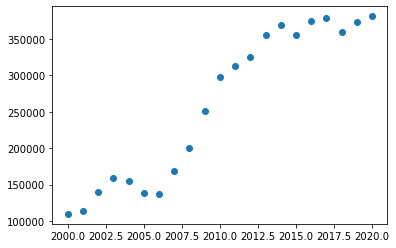

In [10]:
# Plot the data 

plt.scatter(X,y)

In [12]:
# Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [13]:
# Creating a Linear Regression(LR) model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Calculate the model's scores

trng_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {trng_score}")
print(f"Testing Score: {trng_score}")

Training Score: 0.9164006410656016
Testing Score: 0.9164006410656016


In [16]:
# Use the model to make predictions

predicted = model.predict(X_test)

In [18]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


predictions = model.predict(X_test[:5])
print(f"Predicted classes: {predictions}")

n_2025 = model.predict([[2025]])
n_2030 = model.predict([[2030]])
n_2035 = model.predict([[2035]])

print('''''')
print(f"Illinois Renewable Energy Production in 2020: {int(test_df.loc[test_df['Year'] == 2020, 'production'].values[0])}")

print('''''')      
print(f'Prediction for 2025: {int(n_2025[0][0])}')
      
print('''''')      
print(f'Prediction for 2030: {int(n_2030[0][0])}')
      
print('''''')      
print(f'Prediction for 2030: {int(n_2035[0][0])}')

Mean Squared Error (MSE): 1318723175.9053748
R-squared (R2): 0.8674144495266848
Predicted classes: [[319851.93726415]
 [351581.51037736]
 [383311.08349057]
 [208798.43136792]
 [129474.4985849 ]]

Illinois Renewable Energy Production in 2020: 381252

Prediction for 2025: 494364

Prediction for 2030: 573688

Prediction for 2030: 653012


<h1>Finding the Best Scores R-Squared (R2)</h1>

<h1>Current-Dollar Gross Domestic Product (GDP)</h1>

<h1>Population</h1>

<h1>Energy Price</h1>

<h1>Multiple Liner Regression to Predict State Energy Difference</h1>

In [52]:
# Import the data
pred_states_df = pd.read_csv("states_energy_merged.csv")


In [53]:
pred_states_df['difference'] = pred_states_df["production"]- pred_states_df["consumption"]

In [54]:
# Dropping consumption column
pred_states_df = pred_states_df.drop(['consumption'], axis=1)

pred_states_df.head()

,State,Year,production,GDP,population,price,difference
0,Alaska,1970,8835.0,0,304,1.39,-173204.0
1,Alabama,1970,132471.0,0,3451,1.37,-1261026.0
2,Arkansas,1970,56933.0,0,1932,1.51,-651971.0
3,Arizona,1970,68919.0,0,1792,1.97,-451482.0
4,California,1970,521978.0,0,20007,1.74,-4977161.0


In [55]:
states = pred_states_df["State"].unique()

state_dicts = {}

for state in states:

    df = pred_states_df.loc[pred_states_df['State'] == state]
    
    
    # Population #
    #============#

    X2 = df['Year'].values.reshape(-1,1)
    y2 = df['population'].values.reshape(-1,1)


    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state= 42)

    # Create and fit the models for each state for RP
    model2 = LinearRegression()
    model2.fit(X2_train, y2_train)

    # Calculate the RP testing & training scores
    trng_score = model2.score(X2_train, y2_train)
    testing_score = model2.score(X2_test, y2_test)

    # Use our models to make RP predictions
    predicted = model2.predict(X2_test)

    # Score the ep predictions with mse and r2 for each state
    mse2 = mean_squared_error(y2_test, predicted)
    r2 = r2_score(y2_test, predicted)

    # Make predictions for RP with MLR
    pop_predictions = []
    for p in range(2021, 2036):
        p_prediction = model.predict([[p]])
        pop_predictions.append(float(p_prediction))
        
        
    df = pred_states_df.loc[pred_states_df['State'] == state]  

    
     # Renewable Production #
    #======================#

    X3 = df['Year'].values.reshape(-1,1)
    y3 = df['production'].values.reshape(-1,1)


    X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state= 42)

    # Create and fit the models for each state for RP
    model3 = LinearRegression()
    model3.fit(X3_train, y3_train)

    # Calculate the RP testing & training scores
    trng_score3 = model3.score(X3_train, y3_train)
    testing_score3 = model3.score(X3_test, y3_test)

    # Use our models to make RP predictions
    predicted3 = model3.predict(X3_test)

    # Score the ep predictions with mse and r2 for each state
    mse3 = mean_squared_error(y3_test, predicted3)
    r2 = r2_score(y3_test, predicted3)

    # Make predictions for RP with MLR
    rp_predictions = []
    for l in range(2021, 2036):
        l_prediction = model3.predict([[l]])
        rp_predictions.append(float(l_prediction))
        
        
     # Energy Price #
     #==============#

    X4 = df['Year'].values.reshape(-1,1)
    y4 = df['price'].values.reshape(-1,1)


    X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=42)

    # Create and fit the models for each state for RP
    model4 = LinearRegression()
    model4.fit(X4_train, y4_train)

    # Calculate the RP testing & training scores
    trng_score4 = model4.score(X4_train, y4_train)
    testing_score4 = model4.score(X4_test, y4_test)

    # Use our models to make RP predictions
    predicted4 = model4.predict(X4_test)

    # Score the ep predictions with mse and r2 for each state
    mse4 = mean_squared_error(y4_test, predicted4)
    r2 = r2_score(y4_test, predicted4)

    # Make predictions for RP with MLR
    ep_predictions = []
    for d in range(2021, 2036):
        d_prediction = model4.predict([[d]])
        ep_predictions.append(float(d_prediction))
        
    
    #  Consumption  #
    #==============#

    X5 = df['Year'].values.reshape(-1,1)
    y5 = df['consumption'].values.reshape(-1,1)


    X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state=42)

    # Create and fit the models for each state for RP
    model5 = LinearRegression()
    model5.fit(X5_train, y5_train)

    # Calculate the RP testing & training scores
    trng_score5 = model5.score(X5_train, y5_train)
    testing_score5 = model5.score(X5_test, y5_test)

    # Use our models to make RP predictions
    predicted5 = model5.predict(X5_test)

    # Score the ep predictions with mse and r2 for each state
    mse5 = mean_squared_error(y_test, predicted5)
    r2 = r2_score(y_test, predicted5)

    # Make predictions for RP with MLR
    consume_predictions = []
    for c in range(2021, 2036):
        c_prediction = model5.predict([[c]])
        consume_predictions.append(float(c_prediction))
    
    
    
    # Energy Difference #
    #==================#

    X6 = df['Year'].values.reshape(-1,1)
    y6 = df['Difference'].values.reshape(-1,1)


    X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state=42)

    # Create and fit the models for each state for RP
    model6 = LinearRegression()
    model6.fit(X6_train, y6_train)

    # Calculate the RP testing & training scores
    trng_score6 = model6.score(X6_train, y6_train)
    testing_score6 = model6.score(X6_test, y6_test)

    # Use our models to make RP predictions
    predicted6 = model6.predict(X6_test)

    # Score the ep predictions with mse and r2 for each state
    mse6 = mean_squared_error(y6_test, predicted6)
    r2 = r2_score(y6_test, predicted6)

    # Make predictions for RP with MLR
    ed_predictions = []
    for x in range(2021, 2036):
        x_prediction = model6.predict([[x]])
        ed_predictions.append(float(x_prediction))
    
        
    # Update States Dictionary
    state_dicts.update({state: {
                        'state': list([state] * len(range(2021, 2036))),
                        'year': list(range(2021, 2035)),
                        'produced_renewable': rp_predictions,
                        'population': pop_predictions,
                        'energy_price': ep_predictions,
                        'total_consumed': consume_predictions,
                        'difference': ed_predictions
                        }})
pred_states_df
pred_state_dicts

KeyError: 'consumption'

In [ ]:
   # Renewable Production #
    #======================#

    X3 = df['Year'].values.reshape(-1,1)
    y3 = df['production'].values.reshape(-1,1)


    X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state= 42)

    # Create and fit the models for each state for RP
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Calculate the RP testing & training scores
    trng_score = model.score(x_train, y_train)
    testing_score = model.score(x_test, y_test)

    # Use our models to make RP predictions
    predicted = model.predict(x_test)

    # Score the ep predictions with mse and r2 for each state
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)

    # Make predictions for RP with MLR
    rp_predictions = []
    for i in range(2021, 2035):
        i_prediction = model.predict([[i]])
        rp_predictions.append(float(i_prediction))
        
        
     # Energy Price #
     #==============#

    x = df['Year'].values.reshape(-1,1)
    y = df['Energy Pr. ($/mil. btu)'].values.reshape(-1,1)


    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 14)

    # Create and fit the models for each state for RP
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Calculate the RP testing & training scores
    trng_score = model.score(x_train, y_train)
    testing_score = model.score(x_test, y_test)

    # Use our models to make RP predictions
    predicted = model.predict(x_test)

    # Score the ep predictions with mse and r2 for each state
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)

    # Make predictions for RP with MLR
    ep_predictions = []
    for i in range(2021, 2035):
        i_prediction = model.predict([[i]])
        ep_predictions.append(float(i_prediction))
        
    
    #  Consumption  #
    #==============#

    X = df['Year'].values.reshape(-1,1)
    y = df['Total Consumed (Bil. Btu)'].values.reshape(-1,1)


    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 14)

    # Create and fit the models for each state for RP
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculate the RP testing & training scores
    trng_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)

    # Use our models to make RP predictions
    predicted = model.predict(X_test)

    # Score the ep predictions with mse and r2 for each state
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)

    # Make predictions for RP with MLR
    consume_predictions = []
    for i in range(2018, 2031):
        i_prediction = model.predict([[i]])
        consume_predictions.append(float(i_prediction))
    
    
    
    # Energy Difference #
    #==================#

    x = df['Year'].values.reshape(-1,1)
    y = df['Difference'].values.reshape(-1,1)


    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 14)

    # Create and fit the models for each state for RP
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Calculate the RP testing & training scores
    trng_score = model.score(x_train, y_train)
    testing_score = model.score(X_test, y_test)

    # Use our models to make RP predictions
    predicted = model.predict(x_test)

    # Score the ep predictions with mse and r2 for each state
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)

    # Make predictions for RP with MLR
    ed_predictions = []
    for i in range(2021, 2035):
        i_prediction = model.predict([[i]])
        ed_predictions.append(float(i_prediction))
    
        
    # Update States Dictionary
    state_dicts.update({state: {
                        'State': list([state] * len(range(2021, 2035))),
                        'Year': list(range(2021, 2035)),
                        'Prod. Renewable (Bil. Btu)': rp_predictions,
                        'Pop. (1000s)': pop_predictions,
                        'Energy Pr. ($/mil. btu)': ep_predictions,
                        'Total Consumed (Bil. Btu)': consume_predictions,
                        'Difference': ed_predictions
                        }})
pred_states_df
pred_state_dicts

In [ ]:
# Create Dictionary of DataFrames
dfs = {}
for state in pred_state_dicts:
    dfs.update({state: pd.DataFrame(pred_state_dicts[state])})

# Append new DataFrames to previous states_df
for state in dfs:
    pred_state_df = pred_state_df.append(dfs[state],ignore_index=True)


pred_state_df = pred_state_df.sort_values(by=["State","Year"])
pred_state_df.head()

In [ ]:
X= pred_state_df.loc[states_df['State'] == "Wisconsin"]

# Plot the data
plt.scatter(X['Year'],X['Total Consumed (Bil. Btu)'])

In [ ]:
pred_statess_df = pred_states_df[['State','Year','Prod. Renewable (Bil. Btu)','Pop. (1000s)','Energy Pr. ($/mil. btu)',
                       'Total Consumed (Bil. Btu)','Difference']]

In [ ]:
states_df.to_csv('"Resources/&&&&&&&&&.csv"', float_format='%.1f')